# ДЗ к семинару 1

Найти самую длинную последовательность упорядоченных чисел в RDD и вывести её.

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488490 sha256=f4757db12e4bdc617bc2e9ac2a43b221ec08b87565b11fbfbff569be062facd0
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from functools import reduce
import matplotlib.pyplot as plt
import timeit, random, itertools, operator, functools, numpy

[6, 9, 9, 3, 6, 3, 8, 6, 3, 1]


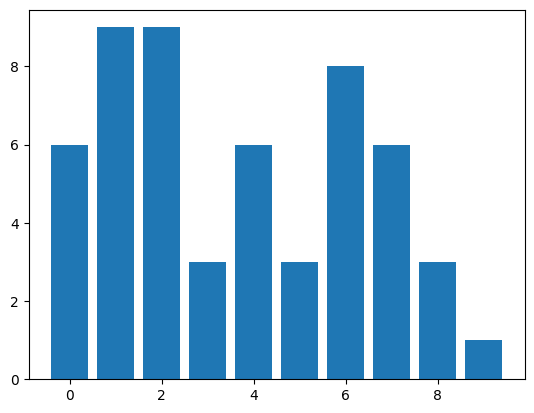

In [9]:
a, b, s = 0, 10, 10
data = list(numpy.random.randint(a, b, s))
print(data)
plt.bar(range(len(data)), data, align='center')
plt.show()

In [78]:
# Создаем SparkContext
sc = SparkContext("local", "Longest Ordered Sequence")
# Преобразуем список в RDD
rdd = sc.parallelize(data)

In [148]:
def find_longest_sequence(rdd):
    current_sequence = [rdd.collect()[0], rdd.collect()[1]] # Создаем первую последовательность из первой пары элементов
    longest_sequence = current_sequence # тут будет храниться самая длинная последовательность, пока что положим туда первую пару
    for num in rdd.collect()[2:]: # пройдемся по всей последовательности, начиная с третьего элемента
        if ((num - current_sequence[-1]) * (current_sequence[-1] - current_sequence[-2])) > 0:
            # найдем любую последовательность: что по возрастанию, что по убыванию
            # путем сравния трех чисел: два уже хранятся в конце переменной current_sequence, а третье в переменной num (например: 5, 7, 10)
            # идея в том, что мы сначала попарно вычитаем (7-5) и (10-7), а затем полученные результаты перемножаем, то есть 2*3=6, это > 0.
            # это произведение в любой последовательности всегда будет больше 0. Еще пример: 6, 3, -6, -12 -> (3-6) * (-6-3) * (-6-(-12) = (-3) * (-9) * (6) = +162 > 0.
            current_sequence.append(num) # добавляем в нашу последовательность новое значение
        else:
            if len(current_sequence) >= len(longest_sequence):
                longest_sequence = current_sequence
            current_sequence = [longest_sequence[-1], num]
    if len(current_sequence) > len(longest_sequence):
      longest_sequence = current_sequence
    return longest_sequence

In [149]:
longest_sequence = find_longest_sequence(rdd)
print(longest_sequence)

[8, 6, 3, 1]


In [77]:
# Останавливаем SparkContext
sc.stop()